In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
import pandas as pd

In [3]:
from datetime import datetime as dt

In [4]:
train = pd.read_csv(
    'data/ijcai2016_koubei_train'
    , header=None, names=['user_id', 'merchant_id', 'location_id', 'timestamp']
    , dtype=str
#     , parse_dates=[3]
#     , nrows=10
)

In [5]:
train['timestamp'] = train.timestamp.map(lambda d: dt.strptime(d, '%Y%m%d'))

In [6]:
train.describe(include='all')

,user_id,merchant_id,location_id,timestamp
count,1081724,1081724,1081724,1081724
unique,230496,5910,458,153
top,930055,820,138,2015-11-30 00:00:00
freq,253,218501,71927,25447
first,NaN,NaN,NaN,2015-07-01 00:00:00
last,NaN,NaN,NaN,2015-11-30 00:00:00


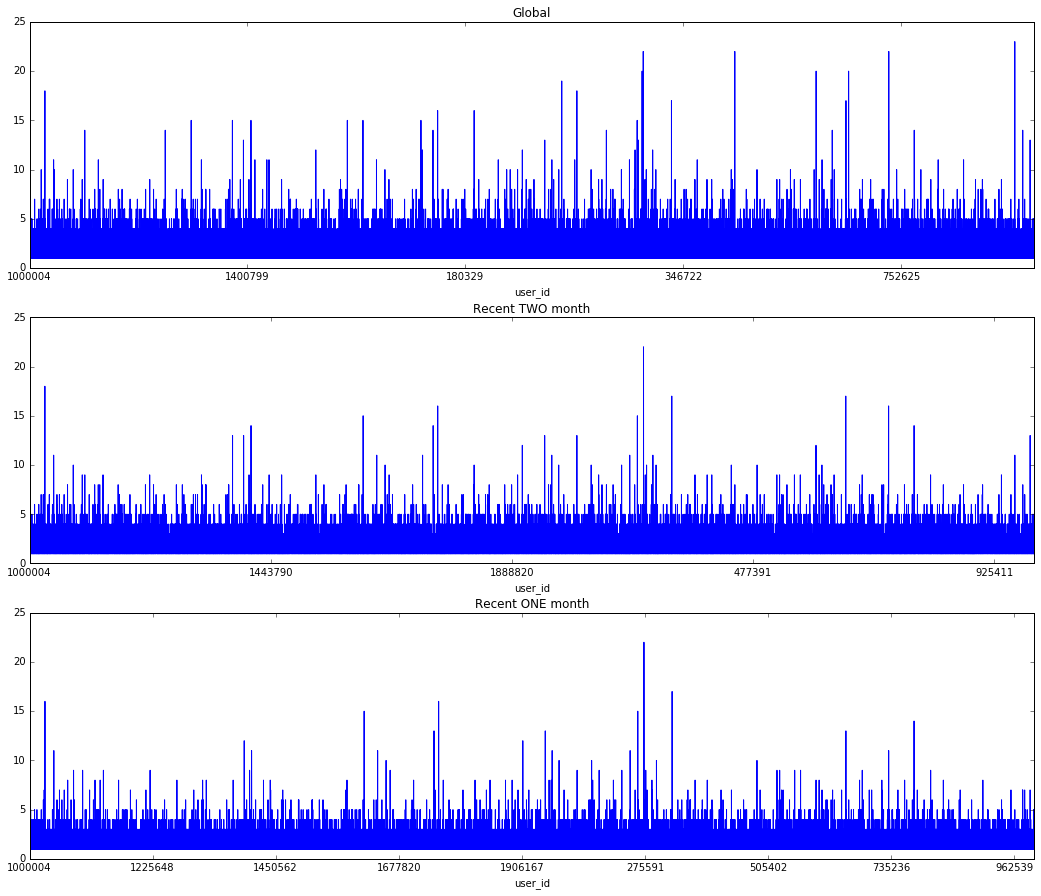

In [7]:
subplot(311);
train.groupby('user_id').merchant_id.nunique().plot(figsize=(18, 15), title=u"Global");
subplot(312);
train[train.timestamp.between('2015-09-30', '2015-11-30')].groupby('user_id').merchant_id.nunique().plot(figsize=(18, 15), title=u"Recent TWO month");
subplot(313);
train[train.timestamp.between('2015-10-30', '2015-11-30')].groupby('user_id').merchant_id.nunique().plot(figsize=(18, 15), title=u"Recent ONE month");

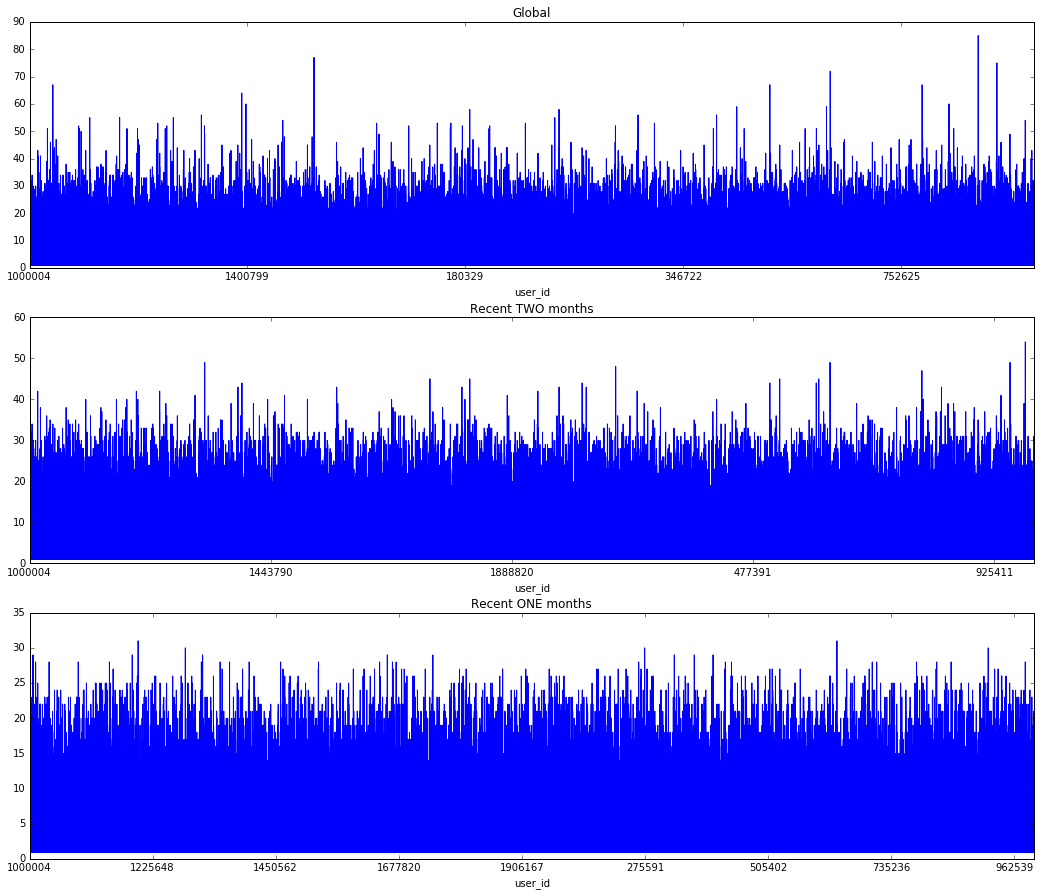

In [8]:
subplot(311);
train.groupby('user_id').timestamp.nunique().plot(figsize=(18, 15), title="Global");
subplot(312);
train[train.timestamp.between('2015-09-30', '2015-11-30')].groupby('user_id').timestamp.nunique().plot(figsize=(18, 15), title="Recent TWO months");
subplot(313);
train[train.timestamp.between('2015-10-30', '2015-11-30')].groupby('user_id').timestamp.nunique().plot(figsize=(18, 15), title="Recent ONE months");

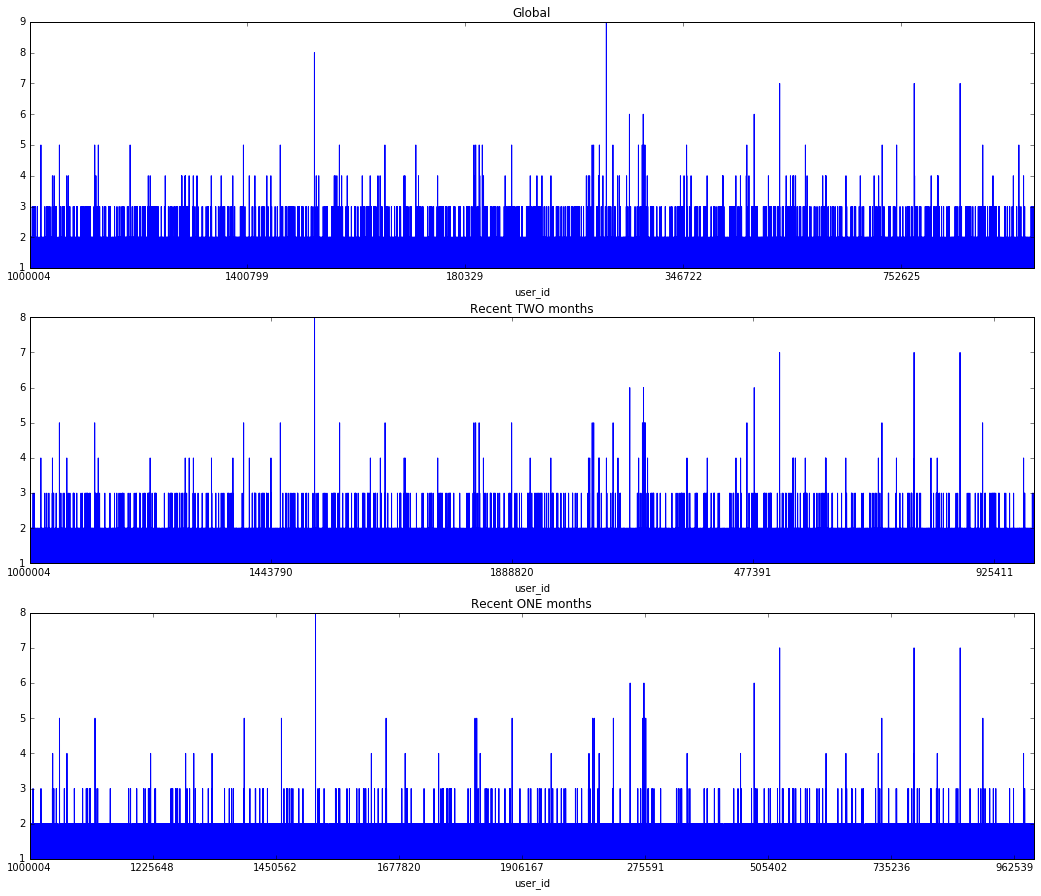

In [9]:
subplot(311);
train.groupby('user_id').location_id.nunique().plot(figsize=(18, 15), title="Global");
subplot(312);
train[train.timestamp.between('2015-09-30', '2015-11-30')].groupby('user_id').location_id.nunique().plot(figsize=(18, 15), title="Recent TWO months");
subplot(313);
train[train.timestamp.between('2015-10-30', '2015-11-30')].groupby('user_id').location_id.nunique().plot(figsize=(18, 15), title="Recent ONE months");

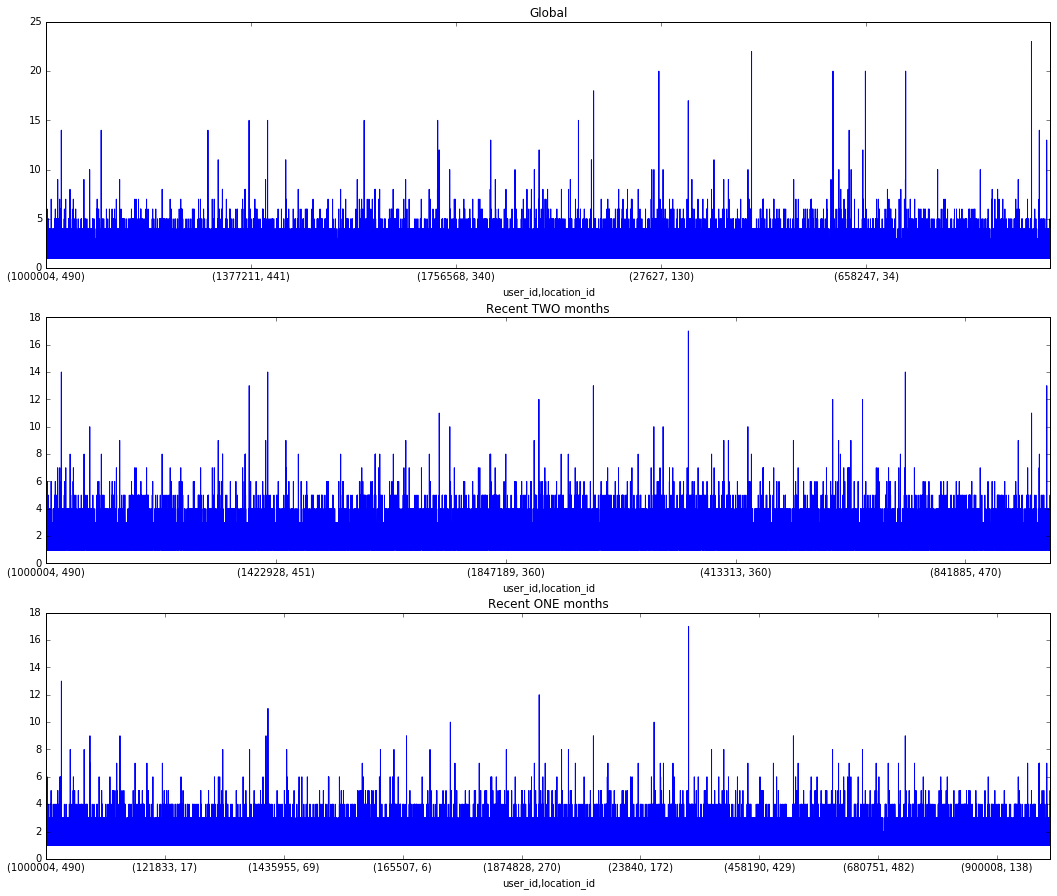

In [10]:
subplot(311);
train.groupby(['user_id', 'location_id']).merchant_id.nunique().plot(figsize=(18, 15), title="Global");
subplot(312);
train[train.timestamp.between('2015-09-30', '2015-11-30')].groupby(['user_id', 'location_id']).merchant_id.nunique().plot(figsize=(18, 15), title="Recent TWO months");
subplot(313);
train[train.timestamp.between('2015-10-30', '2015-11-30')].groupby(['user_id', 'location_id']).merchant_id.nunique().plot(figsize=(18, 15), title="Recent ONE months");

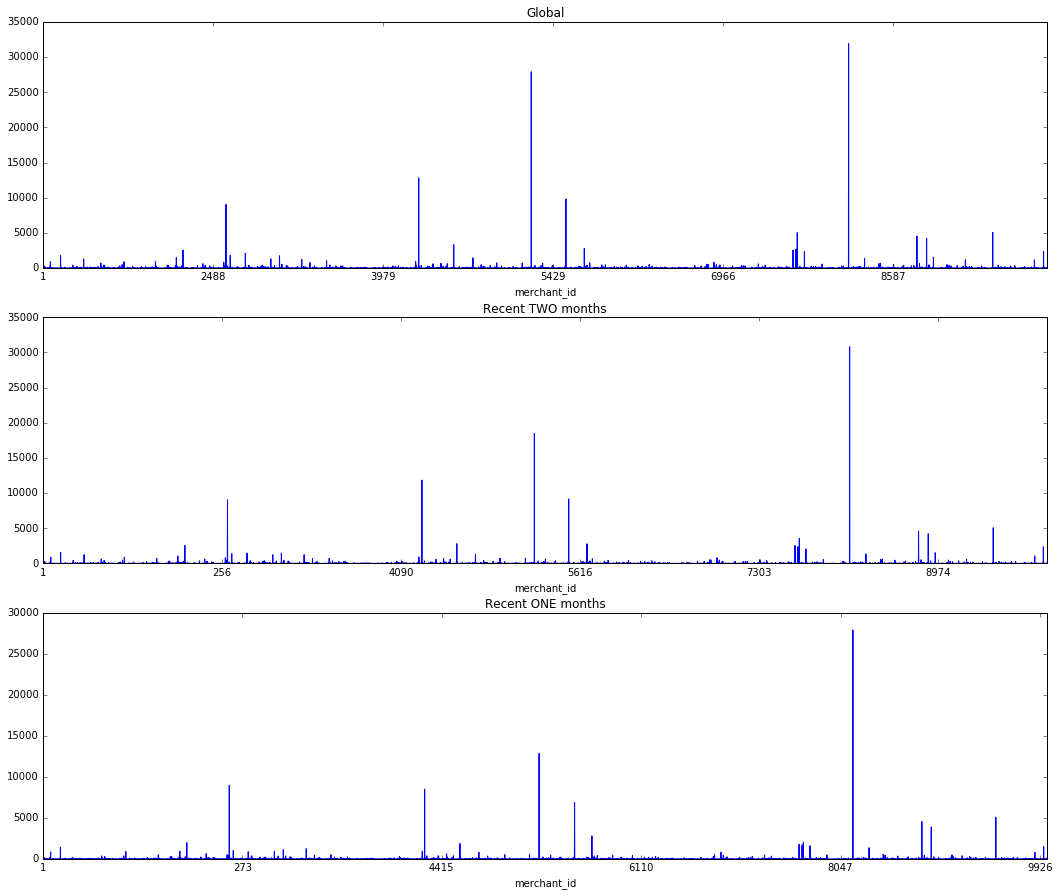

In [11]:
subplot(311);
train.groupby('merchant_id').user_id.nunique().plot(figsize=(18, 15), title="Global");
subplot(312);
train[train.timestamp.between('2015-09-30', '2015-11-30')].groupby('merchant_id').user_id.nunique().plot(figsize=(18, 15), title="Recent TWO months");
subplot(313);
train[train.timestamp.between('2015-10-30', '2015-11-30')].groupby('merchant_id').user_id.nunique().plot(figsize=(18, 15), title="Recent ONE months");

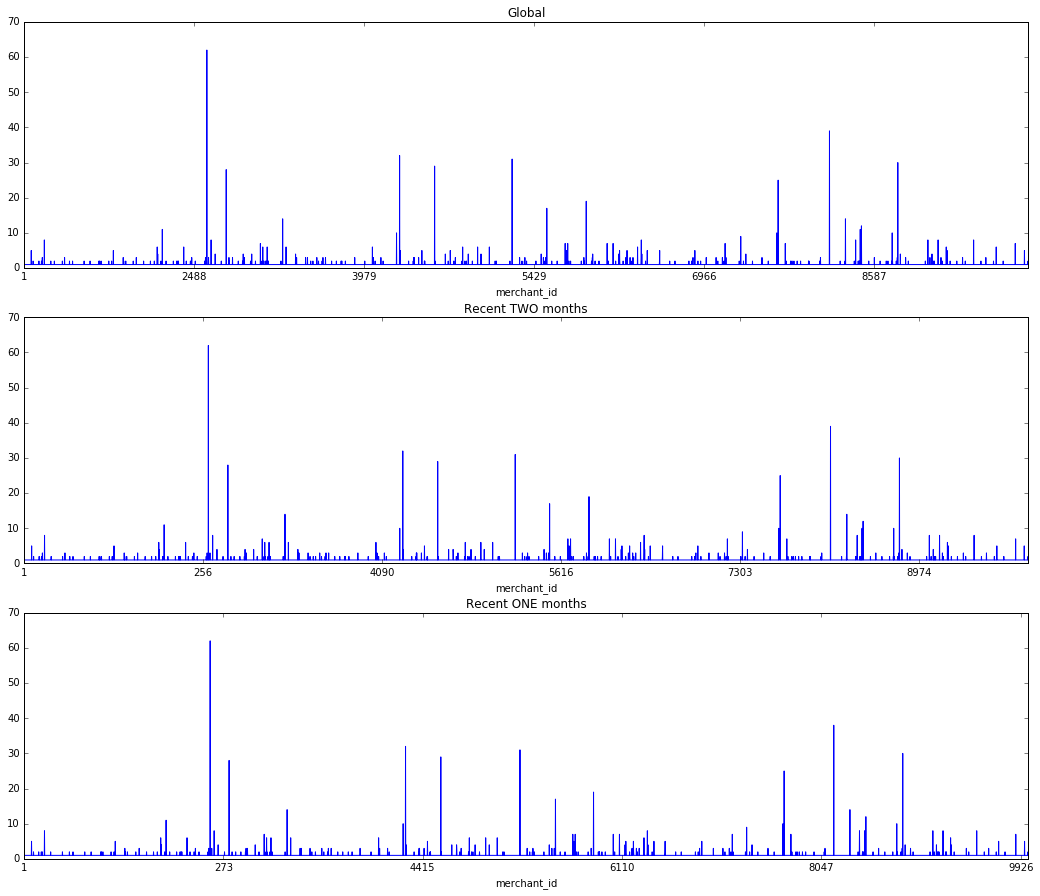

In [12]:
subplot(311);
train.groupby('merchant_id').location_id.nunique().plot(figsize=(18, 15), title="Global");
subplot(312);
train[train.timestamp.between('2015-09-30', '2015-11-30')].groupby('merchant_id').location_id.nunique().plot(figsize=(18, 15), title="Recent TWO months");
subplot(313);
train[train.timestamp.between('2015-10-30', '2015-11-30')].groupby('merchant_id').location_id.nunique().plot(figsize=(18, 15), title="Recent ONE months");

In [13]:
count_nonzero((train[train.timestamp.between('2015-08-30', '2015-11-30')].groupby('merchant_id').location_id.nunique() - train[train.timestamp.between('2015-09-30', '2015-11-30')].groupby('merchant_id').location_id.nunique()) != 0)

154